<a href="https://colab.research.google.com/github/kernelphan/ML-DL-Project/blob/main/Vietnamese%20Food%20Recognition%20Using%20Convolutional%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset root
train_path ='/content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy'
valid_path = '/content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy'
test_path = '/content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy'

In [ ]:
# Function to count images in each class directory
import os
def count_images_in_directory(path):
    total_images = 0
    class_count = {}
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            total_images += num_images
            class_count[class_dir] = num_images
    return total_images, class_count

# Count images in each dataset
train_total, train_classes = count_images_in_directory(train_path)
valid_total, valid_classes = count_images_in_directory(valid_path)
test_total, test_classes = count_images_in_directory(test_path)

# Print results
print(f"Train dataset: {train_total} images across {len(train_classes)} classes")
print(f"Validation dataset: {valid_total} images across {len(valid_classes)} classes")
print(f"Test dataset: {test_total} images across {len(test_classes)} classes")


Train dataset: 1362 images across 3 classes
Validation dataset: 195 images across 3 classes
Test dataset: 391 images across 3 classes


In [ ]:
from PIL import Image

# Function to resize images
def resize_images_in_directory(path, target_size=(180, 180)):
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                with Image.open(img_path) as img:
                    # Resize image
                    img_resized = img.resize(target_size)
                    # Convert to RGB (if not already)
                    img_resized = img_resized.convert("RGB")
                    # Save the resized image
                    img_resized.save(img_path)

# Resize images in train, validation, and test datasets
resize_images_in_directory(train_path)
resize_images_in_directory(valid_path)
resize_images_in_directory(test_path)

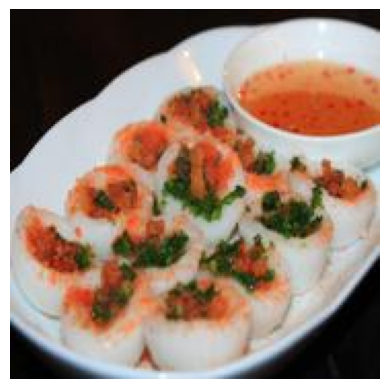

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy/Banh beo/157.jpg
Image size: (180, 180)


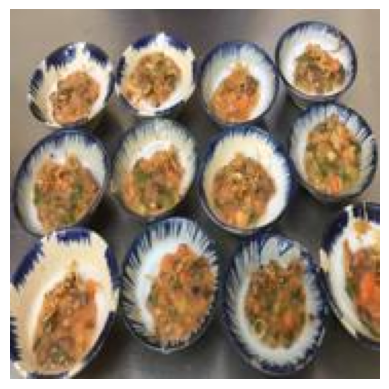

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy/Banh beo/424.jpg
Image size: (180, 180)


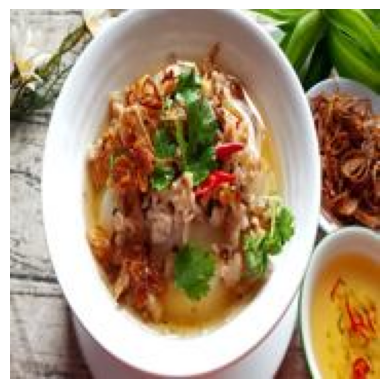

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy/Banh duc/23.jpg
Image size: (180, 180)


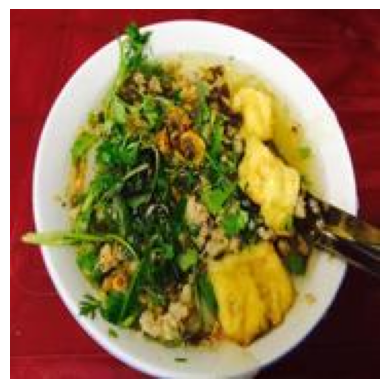

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy/Banh duc/27.jpg
Image size: (180, 180)


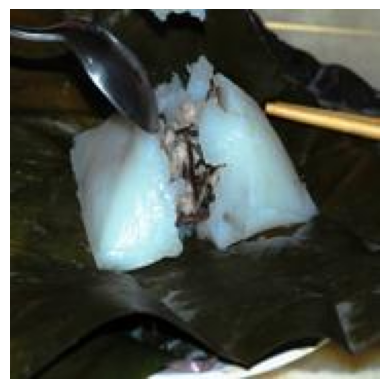

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy/Banh gio/145.jpg
Image size: (180, 180)


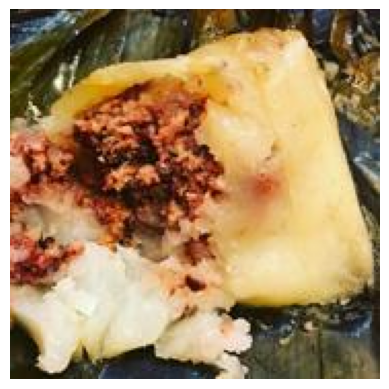

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Train/GiuaKy/Banh gio/106.jpg
Image size: (180, 180)


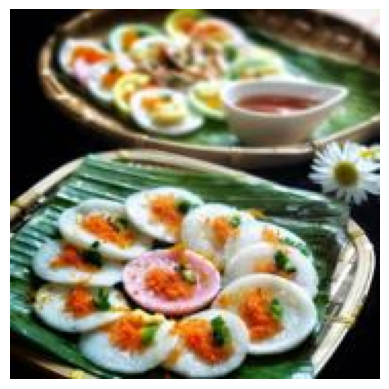

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy/Banh beo/178.jpg
Image size: (180, 180)


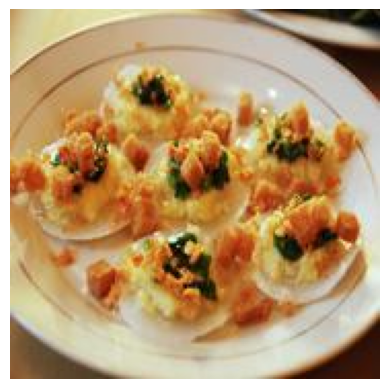

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy/Banh beo/347.jpg
Image size: (180, 180)


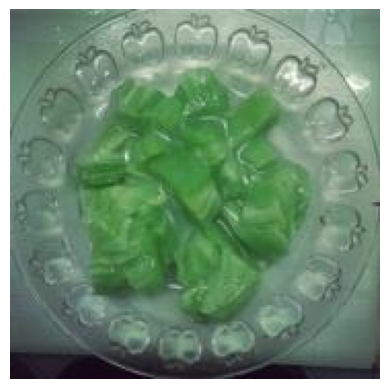

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy/Banh duc/176.jpg
Image size: (180, 180)


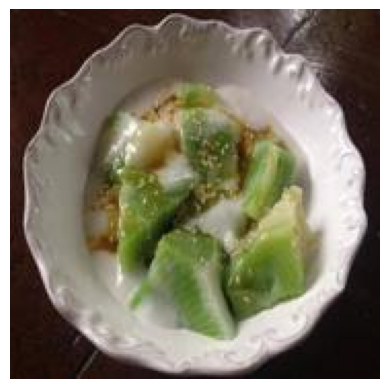

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy/Banh duc/18.jpg
Image size: (180, 180)


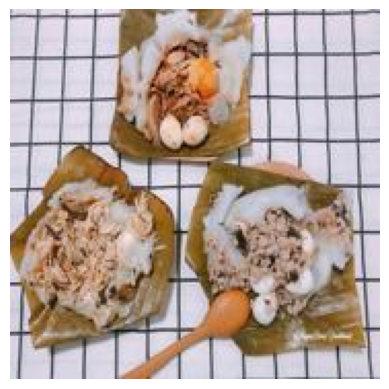

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy/Banh gio/405.jpg
Image size: (180, 180)


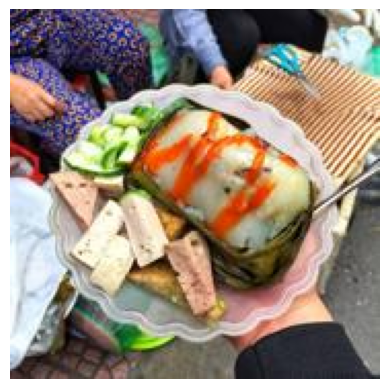

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Test/GiuaKy/Banh gio/55.jpg
Image size: (180, 180)


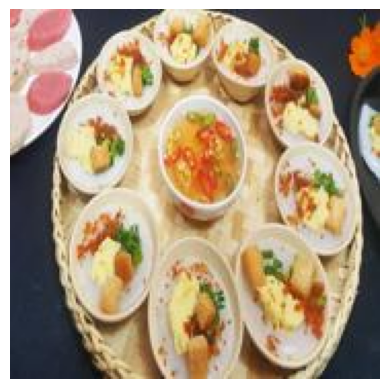

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy/Banh beo/155.jpg
Image size: (180, 180)


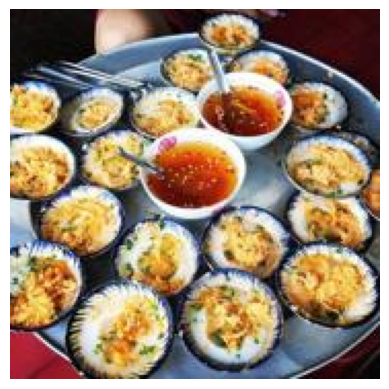

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy/Banh beo/196.jpg
Image size: (180, 180)


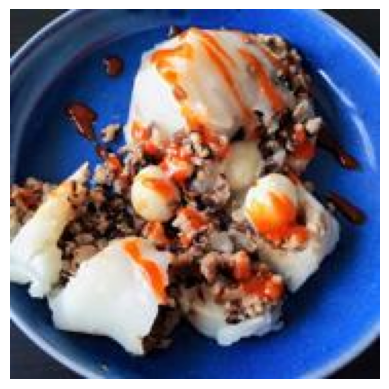

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy/Banh gio/560.jpg
Image size: (180, 180)


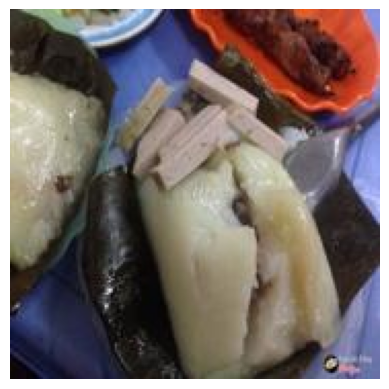

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy/Banh gio/268.jpg
Image size: (180, 180)


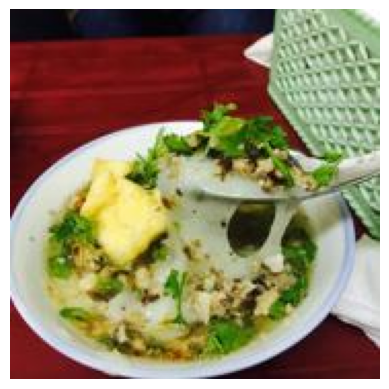

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy/Banh duc/620.jpg
Image size: (180, 180)


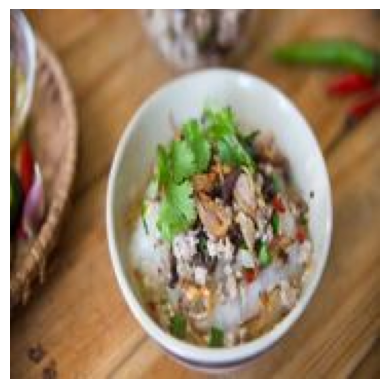

Image: /content/drive/MyDrive/DEEP LEARNING/30VNFOOD/11/Images/Validate/GiuaKy/Banh duc/56.jpg
Image size: (180, 180)


In [ ]:
import matplotlib.pyplot as plt

# Function to get and display the first two images in a directory
def show_first_two_images_from_directory(path):
    # Get list of all subdirectories (classes)
    class_dirs = [os.path.join(path, class_dir) for class_dir in os.listdir(path) if os.path.isdir(os.path.join(path, class_dir))]

    # Loop through class directories
    for class_dir in class_dirs:
        # Get list of image files in the directory
        image_files = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

        # If there are at least 2 images, display the first two
        if len(image_files) >= 2:
            for img_path in image_files[:2]:
                with Image.open(img_path) as img:
                    # Display the image
                    plt.imshow(img)
                    plt.axis('off')  # Hide axes
                    plt.show()

                    # Show the image size (dimensions)
                    print(f"Image: {img_path}")
                    print(f"Image size: {img.size}")  # Prints (width, height)


show_first_two_images_from_directory(train_path)
show_first_two_images_from_directory(test_path)
show_first_two_images_from_directory(valid_path)


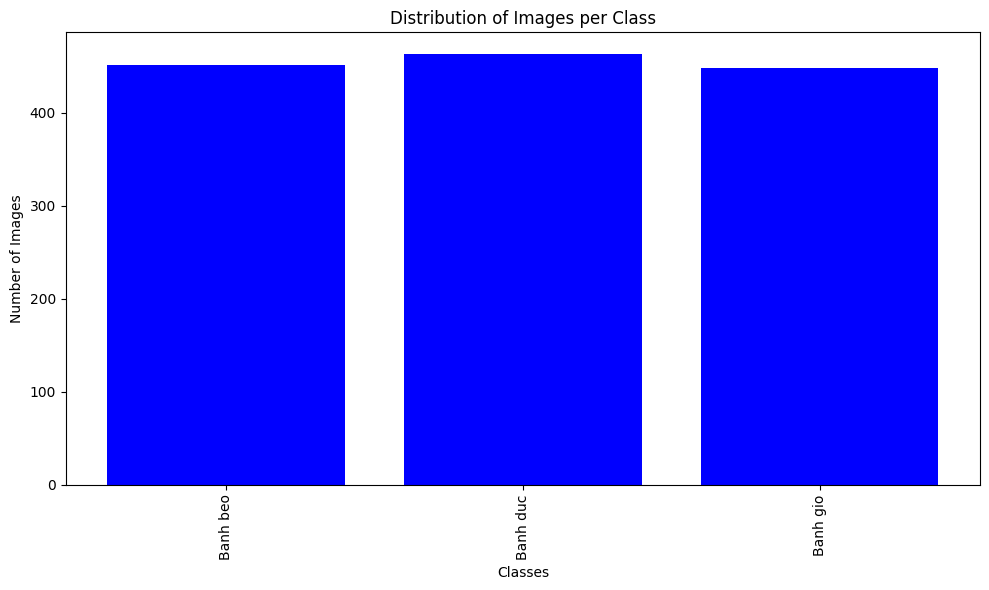

In [ ]:
# Example dataset path
# dataset_path = '/kaggle/input/vietnamese-foods/Images/Train'

# Function to count images in each class
def count_images_in_directory(path):
    class_counts = {}
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            num_images = len([img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_dir] = num_images
    return class_counts

# Count images in train dataset
train_class_counts = count_images_in_directory(train_path)

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='blue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


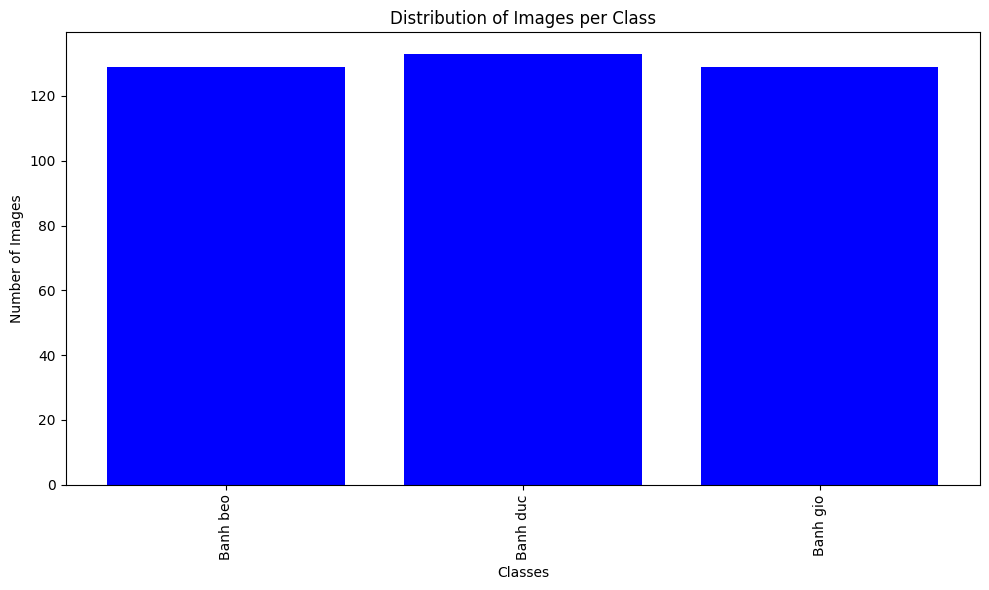

In [ ]:
# Example dataset path
# dataset_path = '/kaggle/input/vietnamese-foods/Images/Train'

# Function to count images in each class
def count_images_in_directory(path):
    class_counts = {}
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            num_images = len([img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_dir] = num_images
    return class_counts

# Count images in train dataset
train_class_counts = count_images_in_directory(test_path)

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='blue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


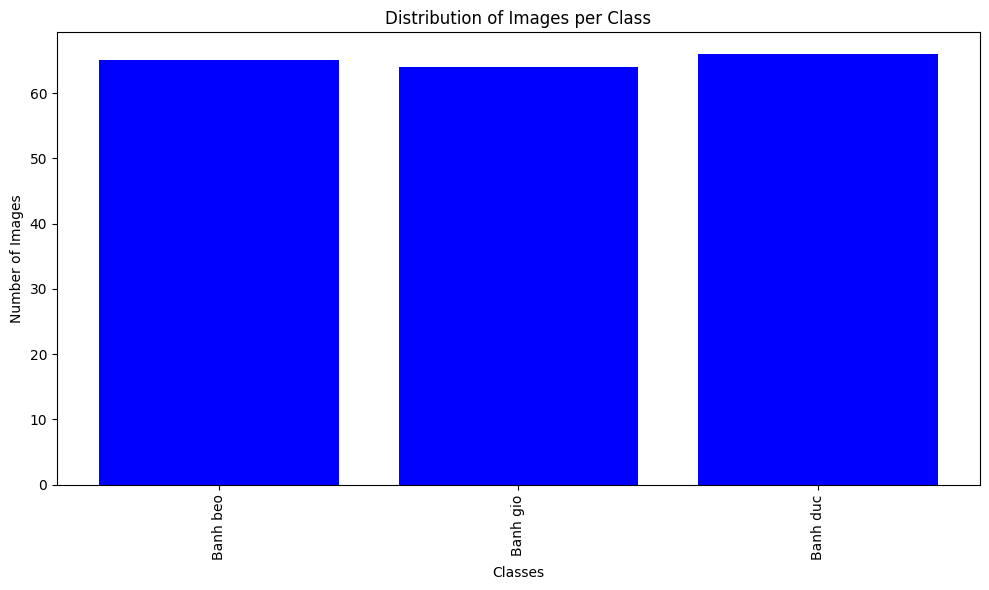

In [ ]:
# Example dataset path
# dataset_path = '/kaggle/input/vietnamese-foods/Images/Train'

# Function to count images in each class
def count_images_in_directory(path):
    class_counts = {}
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            num_images = len([img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_dir] = num_images
    return class_counts

# Count images in train dataset
train_class_counts = count_images_in_directory(valid_path)

# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='blue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define paths
# train_path = '/kaggle/input/vietnamese-foods/Images/Train'
# valid_path = '/kaggle/input/vietnamese-foods/Images/Validate'
# test_path = '/kaggle/input/vietnamese-foods/Images/Test'

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          validation_data=valid_generator,
          epochs=10)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 1362 images belonging to 3 classes.
Found 195 images belonging to 3 classes.
Found 391 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.3583 - loss: 1.2814 - val_accuracy: 0.3385 - val_loss: 1.0845
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.4030 - loss: 1.0691 - val_accuracy: 0.4615 - val_loss: 1.0422
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4804 - loss: 1.0045 - val_accuracy: 0.4769 - val_loss: 1.0167
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.5435 - loss: 0.9260 - val_accuracy: 0.5231 - val_loss: 0.9637
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6298 - loss: 0.8127 - val_accuracy: 0.5282 - val_loss: 1.0216
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.6975 - loss: 0.7052 - val_accuracy: 0.5590 - val_loss: 1.0357
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7708 - loss: 0.5704 - val_accuracy: 0.5128 - val_loss: 1.1582
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.7724 - loss: 0.5235 - val_accuracy: 0.5179 - val_loss: 1.2

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/content/sample_data/images.jpg'
img = image.load_img(img_path, target_size=(180, 180)) # Load and resize image

# Preprocess the image
img_array = image.img_to_array(img) # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array /= 255.0 # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted class: [0]


In [ ]:
# MobileNetv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load MobileNetV2 pre-trained model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model_mobilenet.fit(train_generator, validation_data=valid_generator, epochs=10)

# Evaluate on test data
test_loss, test_acc = model_mobilenet.evaluate(test_generator)
print(f'MobileNetV2 Test Accuracy: {test_acc}')


<ipython-input-18-97f16ee0cfa8>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(180, 180, 3))


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7166 - loss: 0.6600 - val_accuracy: 0.8051 - val_loss: 0.5547
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8841 - loss: 0.2847 - val_accuracy: 0.8256 - val_loss: 0.4277
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9223 - loss: 0.2162 - val_accuracy: 0.8256 - val_loss: 0.4190
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9485 - loss: 0.1650 - val_accuracy: 0.7949 - val_loss: 0.4811
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9643 - loss: 0.1016 - val_accuracy: 0.8103 - val_loss: 0.4785
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 997ms/step - accuracy: 0.9827 - loss: 0.0759 - val_accuracy: 0.8205 - val_loss: 0.4313
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9920 - loss: 0.0504 - val_accuracy: 0.8513 - val_loss: 0.5041
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9976 - loss: 0.0342 - val_accuracy: 0.8462 - val_lo

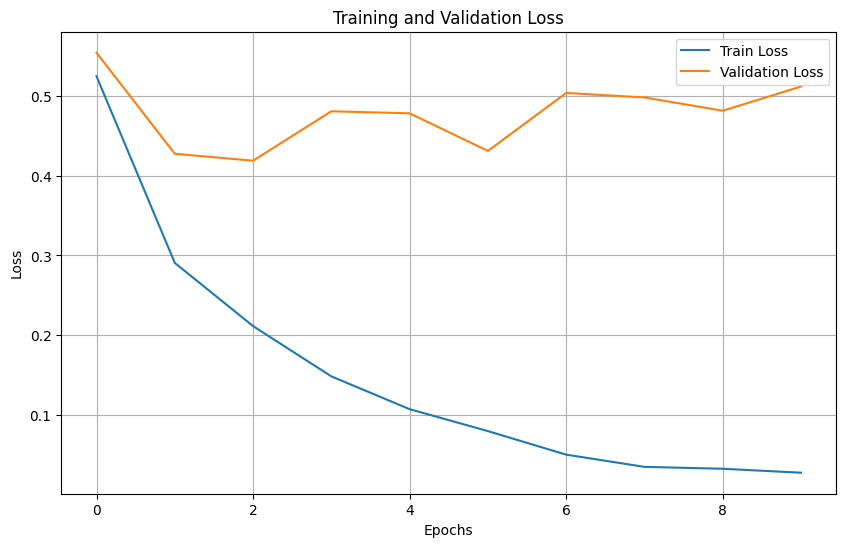

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/content/sample_data/images.jpg'
img = image.load_img(img_path, target_size=(180, 180)) # Load and resize image

# Preprocess the image
img_array = image.img_to_array(img) # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array /= 255.0 # Normalize pixel values

# Make predictions
predictions = model_mobilenet.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: [0]


In [ ]:
# Build CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # Import BatchNormalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
          validation_data=valid_generator,
          epochs=10)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.4319 - loss: 10.8105 - val_accuracy: 0.3436 - val_loss: 2.7890
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.5689 - loss: 2.9353 - val_accuracy: 0.3385 - val_loss: 2.0481
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.7053 - loss: 1.2012 - val_accuracy: 0.3487 - val_loss: 2.1593
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.7420 - loss: 0.6544 - val_accuracy: 0.3897 - val_loss: 1.2652
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.8073 - loss: 0.4708 - val_accuracy: 0.3590 - val_loss: 2.5442
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.8570 - loss: 0.3720 - val_accuracy: 0.3795 - val_loss: 2.0843
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.8669 - loss: 0.3494 - val_accuracy: 0.5026 - val_loss: 1.6333
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.9099 - loss: 0.2372 - val_accuracy: 0.5231 - 

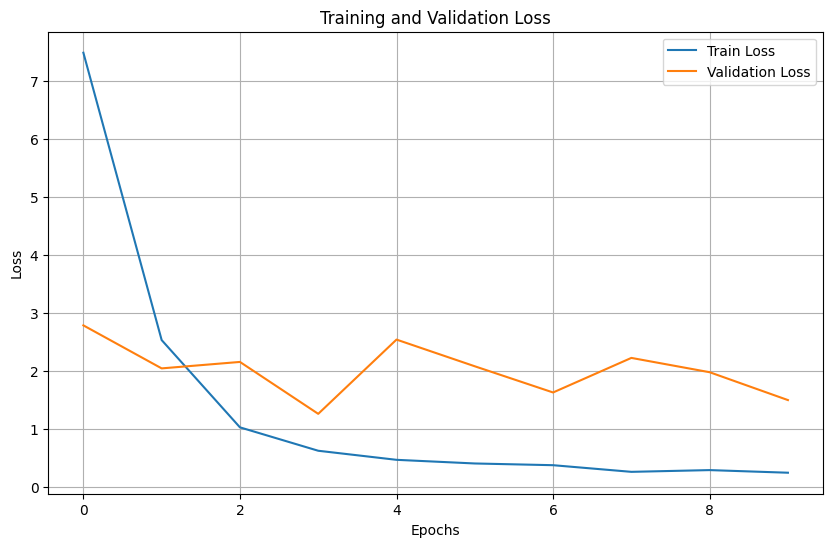

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Mở khóa một số lớp cuối cùng
for layer in base_model.layers[-20:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.optimizers import Adam

# Giảm learning rate
fine_tune_learning_rate = 1e-5
model_mobilenet.compile(optimizer=Adam(learning_rate=fine_tune_learning_rate),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import Adam

# Giảm learning rate
fine_tune_learning_rate = 1e-5
model_mobilenet.compile(optimizer=Adam(learning_rate=fine_tune_learning_rate),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])


In [ ]:
history_finetune = model_mobilenet.fit(train_generator,
                                        validation_data=valid_generator,
                                        epochs=10)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7468 - loss: 1.0810 - val_accuracy: 0.8103 - val_loss: 0.5647
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8562 - loss: 0.4702 - val_accuracy: 0.8000 - val_loss: 0.6116
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9115 - loss: 0.2377 - val_accuracy: 0.8205 - val_loss: 0.5956
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9202 - loss: 0.1946 - val_accuracy: 0.8410 - val_loss: 0.5630
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9370 - loss: 0.1849 - val_accuracy: 0.8410 - val_loss: 0.5385
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9693 - loss: 0.1167 - val_accuracy: 0.8359 - val_loss: 0.5261
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9635 - loss: 0.1156 - val_accuracy: 0.8462 - val_loss: 0.5229
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9736 - loss: 0.0872 - val_accuracy: 0.8462 - val_loss:

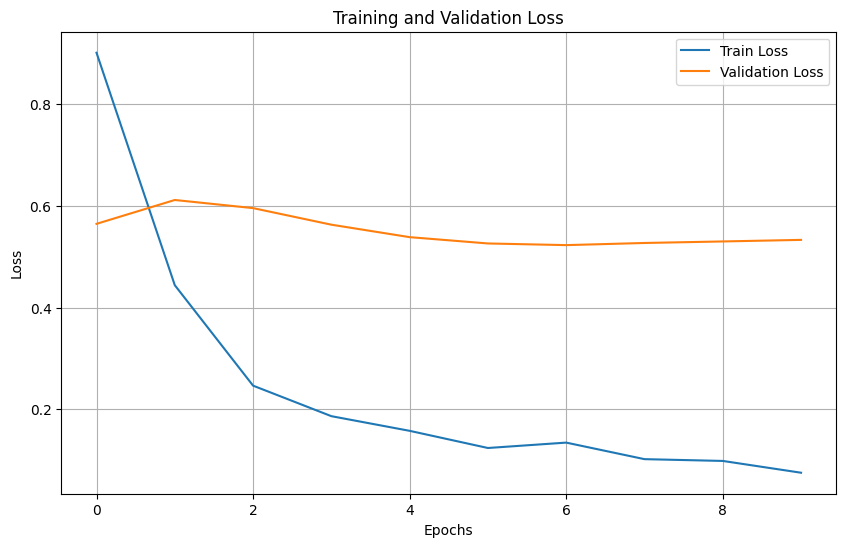

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()